<a href="https://colab.research.google.com/github/yudhiesh1997/Optimisation-Deep-Learning/blob/master/LinearProgramming2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
from scipy.optimize import minimize
!pip install pulp 
import pulp as p 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
# Create a LP minimization problem 
lp_prob = p.LpProblem("Problem", p.LpMinimize)

# Create the problem variables 
x = p.LpVariable("x", lowBound = 0)
y = p.LpVariable("y", lowBound = 0)

# Objective functions 
lp_prob += 3 * x + 5 * y

# Constraints
lp_prob += 2 * x + 3 * y >= 12
lp_prob += -x + y <= 3
lp_prob += x >= 4
lp_prob += y <= 3

# Display the problems
print(lp_prob)

# Solver
status = lp_prob.solve()

# The solution status 
print(p.LpStatus[status])

# Printing the final solution
print(p.value(x), p.value(y),  p.value(lp_prob.objective))

Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
6.0 0.0 18.0


Text(0, 0.5, '$y$')

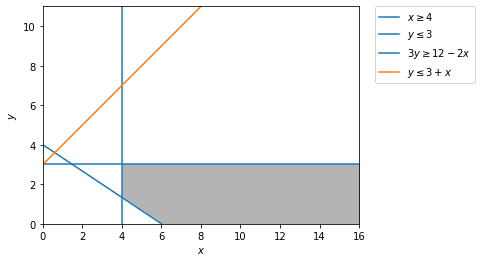

In [4]:
d = np.linspace(-2, 16,300)
x,y = np.meshgrid(d,d)
plt.imshow(((y<=3) & (3* y> -2*x +12) & (y<=x+3) & (x>=4)).astype(int),
extent=(x.min(), x.max(), y.min(), y.max()), origin ="lower", cmap="Greys", alpha=0.3)

# construct the lines
x = np.linspace(0,20,2000)

y1 = (12 - 2*x) / 3

y2 = 3 + x

#geq = greater equal to 
#leq = less equal to 

plt.axhline(y=3, xmin= 0, xmax=20, label=r'$x\geq4$')
plt.axvline(x=4, ymax=20, label=r'$y\leq3$')
plt.plot(x,y1, label=r'$3y\geq12-2x$')
plt.plot(x, y2, label=r'$y\leq3+x$')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

plt.xlim((0,16))
plt.ylim((0,11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

In [5]:
# Create a LP minimization problem 
lp_prob = p.LpProblem("Problem", p.LpMaximize)

# Create the problem variables 
x1 = p.LpVariable("x1", lowBound = 0)
x2 = p.LpVariable("x2", lowBound = 0)

# Objective functions 
lp_prob += 10 * x1 + 9 * x2

# Constraints
lp_prob += 7/10 * x1 + x2 <= 630
lp_prob += 1/2 * x1 + 5/6 * x2 <= 600
lp_prob += x1 + 2/3 * x2 <= 708
lp_prob += 1/10 * x1 + 1/4 * x2 <= 135

# Display the problems
print(lp_prob)

# Solver
status = lp_prob.solve()

# The solution status 
print(p.LpStatus[status])

# Printing the final solution
print(p.value(x1), p.value(x2),  p.value(lp_prob.objective))

Problem:
MAXIMIZE
10*x1 + 9*x2 + 0
SUBJECT TO
_C1: 0.7 x1 + x2 <= 630

_C2: 0.5 x1 + 0.833333333333 x2 <= 600

_C3: x1 + 0.666666666667 x2 <= 708

_C4: 0.1 x1 + 0.25 x2 <= 135

VARIABLES
x1 Continuous
x2 Continuous

Optimal
540.0 252.0 7668.0


Text(0, 0.5, '$y$')

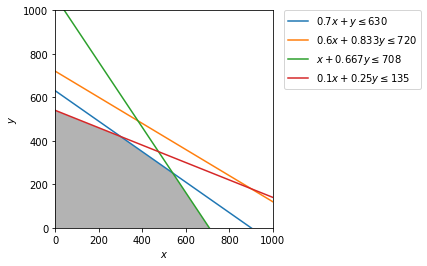

In [6]:
d = np.linspace(0, 1000, 1000)
x1,x2 = np.meshgrid(d,d)
plt.imshow(((x2<=630 - 0.7 * x1) & (0.5 * x1 <= 600 - 0.833333333333 * x2) & (x1 <= 708 - 0.666666666667 * x2) & (0.1 * x1 <= 135 - 0.25 * x2)).astype(int),
extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin ="lower", cmap="Greys", alpha=0.3)

# plot line constraints 
x = np.linspace(0,1000,300)
y1 = 630 - 0.7*x
y2 = 720 - 0.6*x
y3 = 1062 - 1.5*x
y4 = 540 - 0.4*x

plt.plot(x,y1, label=r'$0.7x + y\leq630$')
plt.plot(x, y2, label=r'$0.6x + 0.833y\leq720$')
plt.plot(x,y3, label=r'$x + 0.667y\leq708$')
plt.plot(x, y4, label=r'$0.1x + 0.25y\leq135$')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

plt.xlim((0,1000))
plt.ylim((0,1000))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


##**Volume  = Length (L) x Width (W) x Height (H)**

##**Surface Area = (2 x L x W) + (2 x L x H) + (2 x W x H)**

    
Let say there is a box and we want to maximise the volume by changing the length, width and height of the box.


### Volume = Length (L) x Width (W) x Height (H)
### Surface Area = (2 x L x W) + (2 x L x H) + (2 x W x H)


The surface area of the box is less than and equal to 10.
(SA <= 10)


Tasks:
1. Define the volume and surface area as a function
2. Define the objective function and constraints function


The surface area of the box is less than and equal to 10.
(SA <= 10)

In [7]:
import numpy as np 
from scipy.optimize import minimize

In [8]:
# Define the function to calculate hte volume of box 
def volume(x):
  len_ = x[0]
  width = x[1]
  height = x[2]
  return len_ * width * height

In [9]:
# Define function to calculate the surface area (SA) of box
def sa(x):
  len_ = x[0]
  width = x[1]
  height = x[2]
  return ((2 * len_ * width) + (2 * len_ * height) + (2 * width * height))

In [10]:
# Define the objective function
def obj(x):
  return - volume(x)
# when doing maximise set the value to negative

# constraint SA(x) <=10
def constraint(x):
  return 10 - sa(x)

# load constraints into dictionary form 
cons = ({"type": "ineq", "fun":constraint})

In [11]:
# set intial values for box dimensions
len_0 = 1
width_0 = 1
height_0 = 1

# load initial values into numpy array 
x0 = np.array([len_0, width_0, height_0])

In [12]:
sol = minimize(obj, x0, method = "SLSQP", constraints=cons, options = {"disp": True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.151657414467269
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4


In [13]:
sol?

In [14]:
# retrieve optimised box sizing and volume 
xOpt = sol.x
volumeOpt = -sol.fun 


In [15]:
# calculate surface area with optimise values 
saOpt = sa(xOpt)
volOpt = volume(xOpt)

In [16]:
print(f'Volume : {volOpt}')
print(f'Surface Area : {saOpt}')
print(f'Length : {xOpt[0]}')
print(f'Width : {xOpt[1]}')
print(f'Height : {xOpt[2]}')

Volume : 2.151657414467269
Surface Area : 9.999999999713689
Length : 1.2909944727867015
Width : 1.290994455352175
Height : 1.2909944180130968


## Example 5 

Snowball Problem

How big a snowball should be after 30 seconds rolling down from a hilland to knock the tree down? Let say it take 25000N force to knock down a tree.






#### Given parameters:
$\mathrm{K}_{0}=85$

Snowball growth factor 1

beta $=0.07$

$C_{-} d=0.3$

drag coefficient

$g=9$

gravity

rho $=350 \quad$ #Snow density

theta = np.radians(5) #slope

rho $_{-} a=0.9$

Air density

Initial snowball conditions:

$\mathrm{m}_{0}=10$

$\mathrm{v}_{0}=0$

$r_{0}=\left(\frac{m_{0}}{\frac{4}{3} \pi \rho}\right)^{\frac{1}{3}}
$ #Initial radius
$\mathrm{s}_{0}=0$


#### Formula for radius:

radius,r$=\left(\frac{m}{\frac{4}{3} \pi \rho}\right)^{\frac{1}{3}}$




#### Function for dynamic snowball:

change in mass, 

$\frac{\mathrm{dm}}{\mathrm{dt}}=\beta K_{0} e^{-\beta t}$
change in radius, 

$\frac{\mathrm{dr}}{\mathrm{dt}}=\frac{\beta K_{0} e^{-\beta t}}{4 \pi p r^{2}}$
change in position, 

$\frac{\mathrm{ds}}{\mathrm{dt}}=v$ change in velocity, 

$\frac{\mathrm{dv}}{\mathrm{dt}}=\frac{-15 p_{a} C_{d}}{56 p}\left(\frac{1}{r}\right) v^{2}-\left(\frac{23}{7}\right)\left(\frac{1}{r}\right)\left(\frac{\beta K_{0} e^{-\beta t}}{4 \pi p r^{2}}\right) v+\frac{5}{7} g \cdot \sin (\theta)$



#### Function for objective function:


Kinetic Energy, $E_{k}=\frac{1}{2} m v^{2}$


Impact Force, $F=\frac{E_{k}}{r}$


Objective function to minimise $(F-25000)^{2}$

In [91]:
from scipy.integrate import odeint 
from scipy.optimize import minimize

In [92]:
# define the parameters
K0 = 85
beta = 0.07
C_d = 0.3
g = 9.8
rho = 350
theta = np.radians(5)
rho_a = 0.9

# initial snowball conditions 
m0 = 10
v0 = 0
r0 = (m0/(4/3.0* np.pi *rho))**(1/3.0)
s0 = 0

# Target Force 
F_d = 25000

# Set up time array to solce for 30 seconds 
t = np.linspace(0,30)

In [93]:
# define the function of dynamics snowball, the equations of motion
def snowball_dynamics(w,t,p):
   
    #Unpack state variables
    M, r, s, v = w
   
    #Unpack parameters
    K0, C_d, g, rho, theta, rho_a, beta = p
   
    #Make an array of the right hand sides of the four differential equations that make up our system
    f = [beta * K0 * np.exp(-beta*t),
        (beta * K0 * np.exp(-beta*t))/(4*np.pi*rho*r**2),
        v,
        (-15*rho_a*C_d)/(56*rho)*1/r*v**2-23/7*1/r*beta*K0*np.exp(-beta*t)/(4*np.pi*rho*r**2)*v+5/7*g*np.sin(theta)]
    return f

In [97]:
#Define the objective function, minimize the output of this function by changing the initial snowball mass
def objective(m0):
  #load parameters
  p = [m0, C_d, g, rho, theta, rho_a, beta]
  #get the initial radius from initial mass
  r0 = (m0/(4/3.0*np.pi*rho))**(1/3.0)
  #set initial guesses
  w0 = [m0, r0, s0, v0]
  #integrate forward for 30 seconds
  sol = odeint(snowball_dynamics, w0, t, args=(p,))
  #calculate kinetic energy at the end of the run
  ke = 0.5 * sol[:,0][-1]* sol[:,3][-1]**2
  #calculate force required to stop snowball in one snowball radius
  F = ke/ sol[:,1][-1]
  #Compare to desired force: This ishould be equal to zero when we are done
  obj = (F - F_d)**2
  return obj

In [98]:
# Call optimisation using the function defined above
res = minimize(objective, m0, options ={"disp": True})

# Get the optimized initial mass from solution 
m0_opt = res.x[0]

# calculate the optimised initial radius from the initial mass
r0_opt = (m0_opt/(4/3.0*np.pi*rho))**(1/3.0)

print(f'Initial mass : {m0_opt}kg {m0_opt*2.02}lbs')
print(f'Initial radiues : {r0_opt*100}cm  {r0_opt*39.37}inches')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 33
         Gradient evaluations: 11
Initial mass : 54.4727546940319kg 110.03496448194444lbs
Initial radiues : 33.36882350231841cm  13.137305812862758inches
